In [65]:
%%capture
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import calendar

plt.figure(figsize=(20,12))
sns.set(rc={'figure.figsize':(20,10)})

ORG_NAME = "Organic"
CONV_NAME = "Conventional"

data = pd.read_csv('avocado.csv')

data['Date']= pd.to_datetime(data['Date']) 
data.set_index('Date', inplace=True)

season_dict = {'1':'Winter',
               '2':'Spring', 
               '3':'Spring', 
               '4':'Spring', 
               '5':'Summer', 
               '6':'Summer', 
               '7':'Summer', 
               '8':'Autumn', 
               '9':'Autumn', 
               '10':'Autumn', 
               '11':'Winter', 
               '12':'Winter'}


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [67]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [68]:
conv = data[data.type == 'conventional']
org = data[data.type == 'organic']

## Price distribution per type

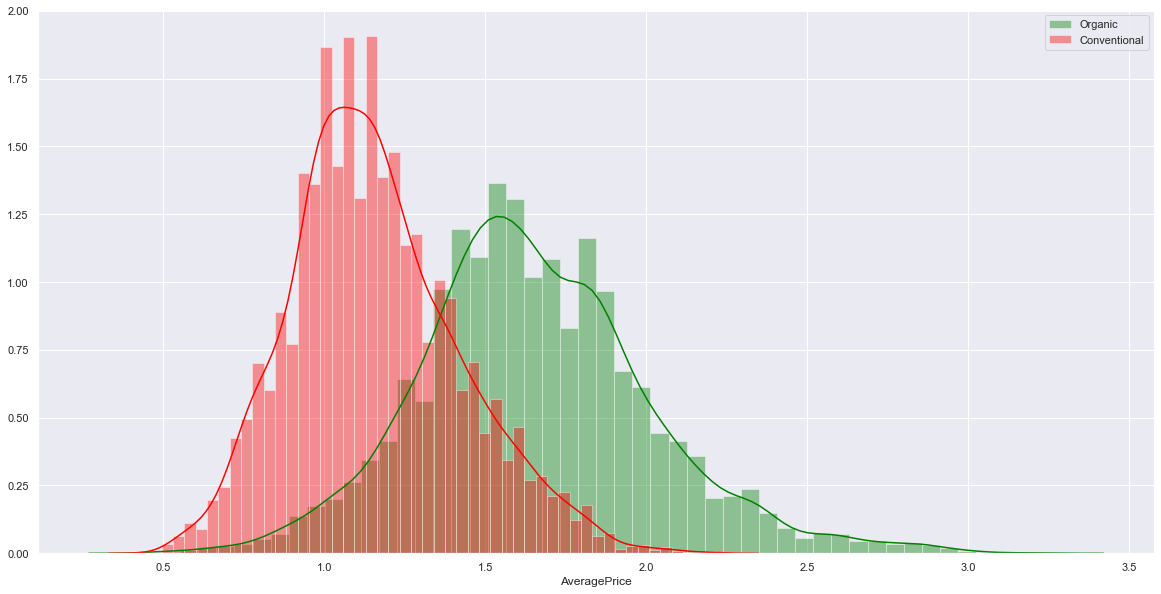

In [5]:
ax = sns.distplot(org.AveragePrice, label=ORG_NAME, color='green')
ax = sns.distplot(conv.AveragePrice, label=CONV_NAME, color='red')
ax.legend()

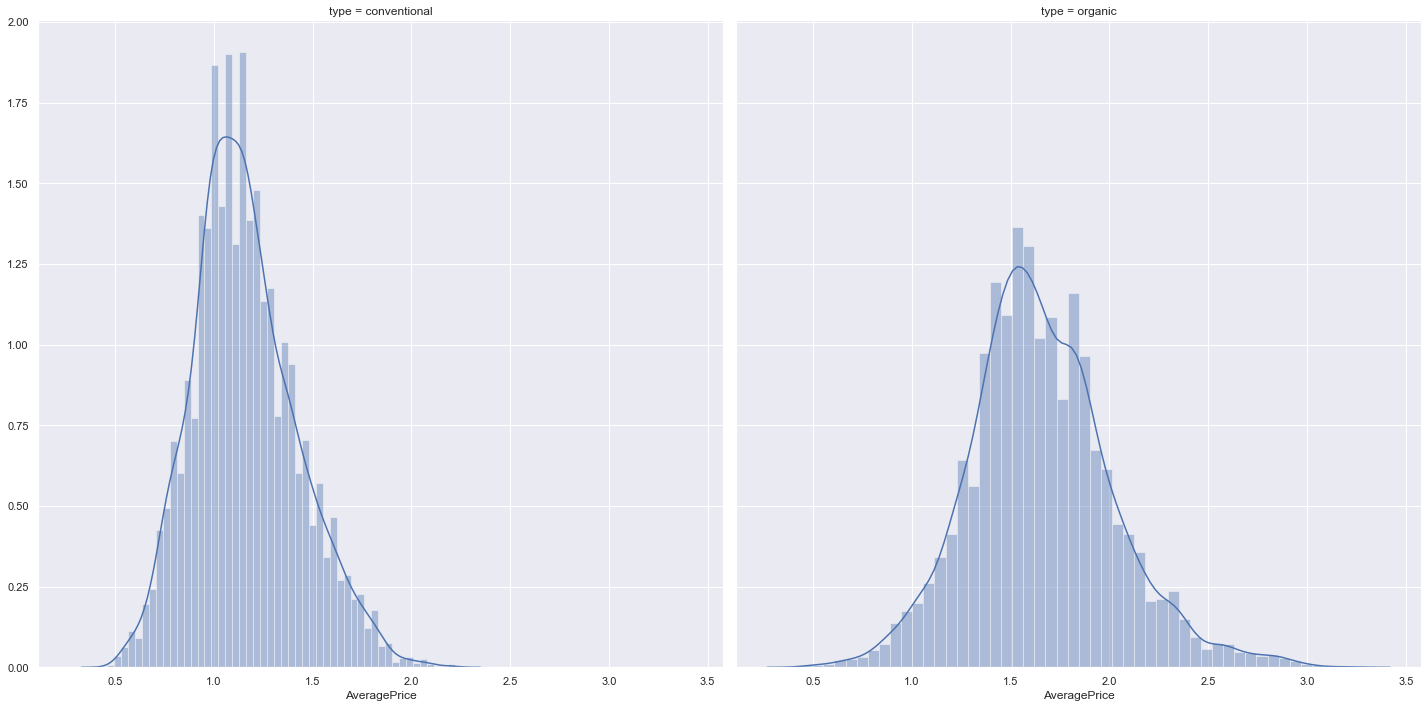

In [6]:
g = sns.FacetGrid(data, col="type", size=10)
g.map(sns.distplot, "AveragePrice")

## Price variation through time

Let's visualize the price variation through time by type of Avocado. First I make a single plot then I use the FactGrid function of sns to split the plot on 2 sub-plots.

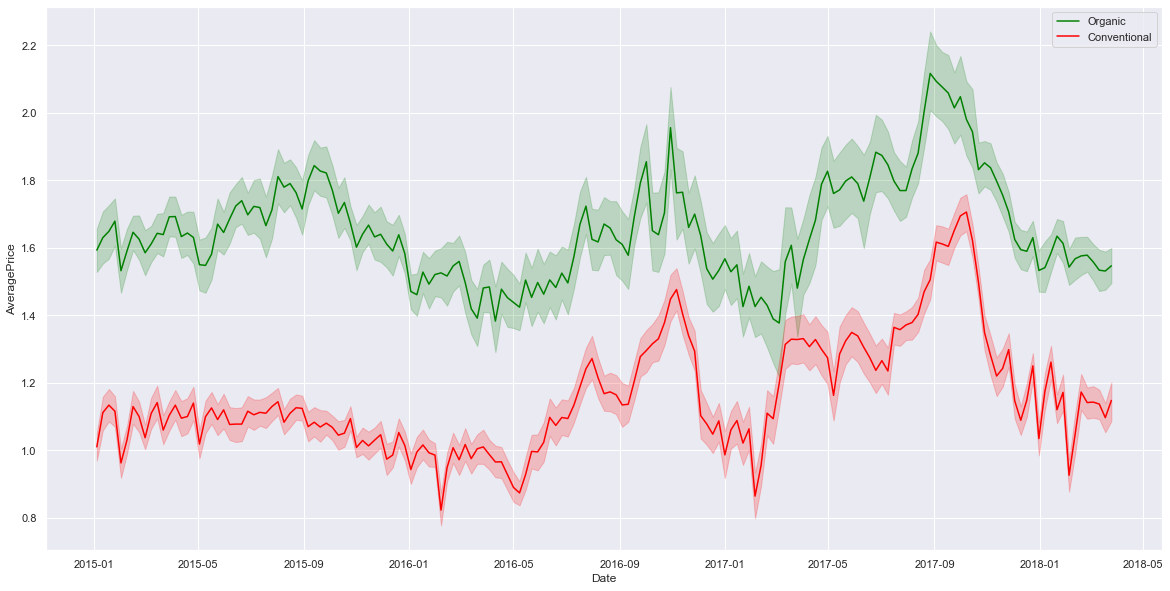

In [7]:
ax = sns.lineplot(x=org.index, y=org.AveragePrice, label=ORG_NAME, color='green')
ax = sns.lineplot(x=conv.index, y=conv.AveragePrice, label=CONV_NAME, color='red')

## Relationship between Price and Volume

Let's analyze the relationship between price and volume: I expect the price being in inverse relationship with volume, because high produced volume brings to lower prices (offer-demand basic law).

### Organic

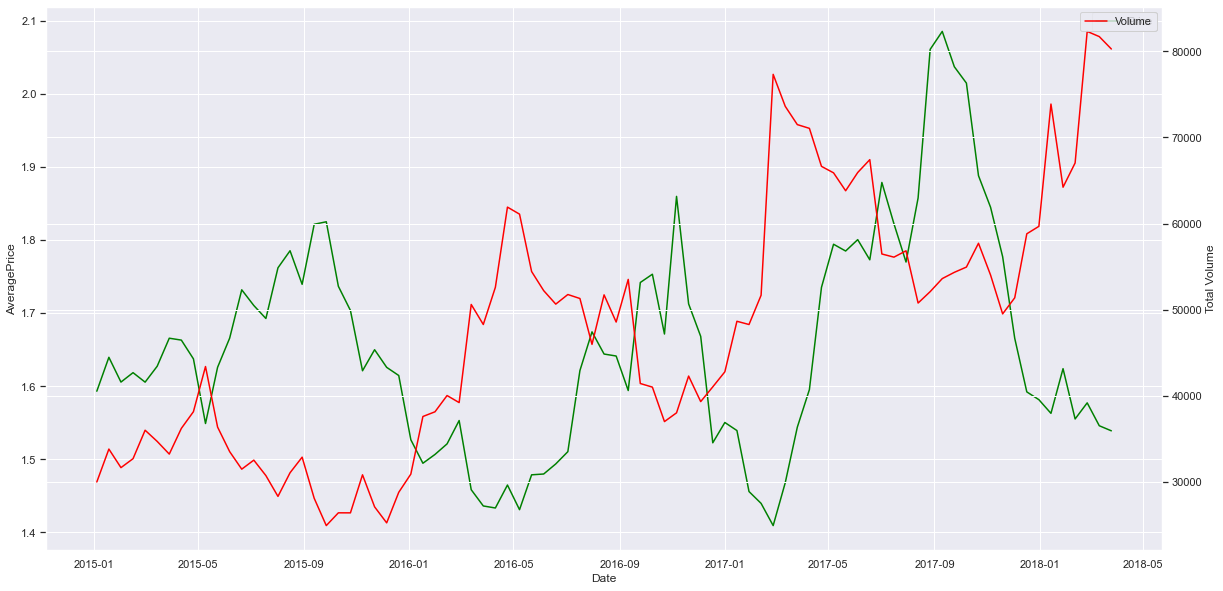

In [8]:
org_res = org.resample('2w').mean()
ax = sns.lineplot(x=org_res.index, y=org_res.AveragePrice, label='Price', color='green')
ax2 = plt.twinx()
ax = sns.lineplot(x=org_res.index, y=org_res['Total Volume'], label='Volume', color='red', ax=ax2)

## Conventional

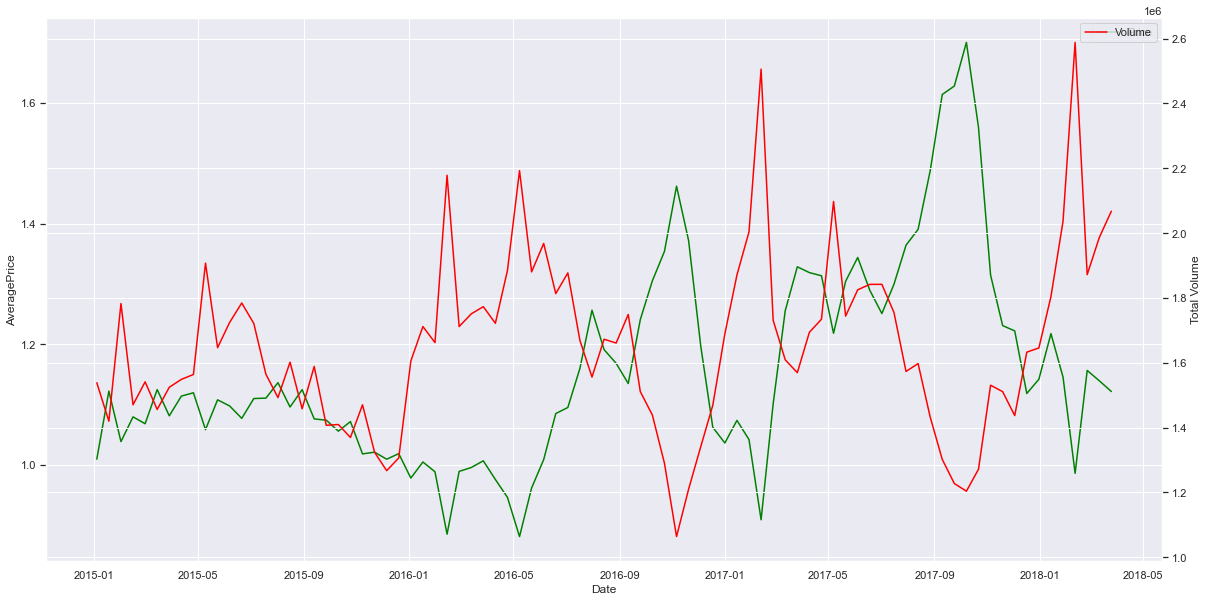

In [9]:
conv_res = conv.resample('2w').mean()
ax = sns.lineplot(x=conv_res.index, y=conv_res.AveragePrice, label='Price', color='green')
ax2 = plt.twinx()
ax = sns.lineplot(x=conv_res.index, y=conv_res['Total Volume'], label='Volume', color='red', ax=ax2)

We can observe how the price is inversely related to the volume produces. Let's see the correlation value between Volume and Price:

In [10]:
print('Correlation for Organic', org_res['Total Volume'].corr(org_res['AveragePrice']))
print('Correlation for Conventional', conv_res['Total Volume'].corr(conv_res['AveragePrice']))

Correlation for Organic -0.12157112805891053
Correlation for Conventional -0.4878667309918981


## Seasonality

We'll now study the seasonality (i.e. significant repeated patterns over a year, a mont, or weather seasons).

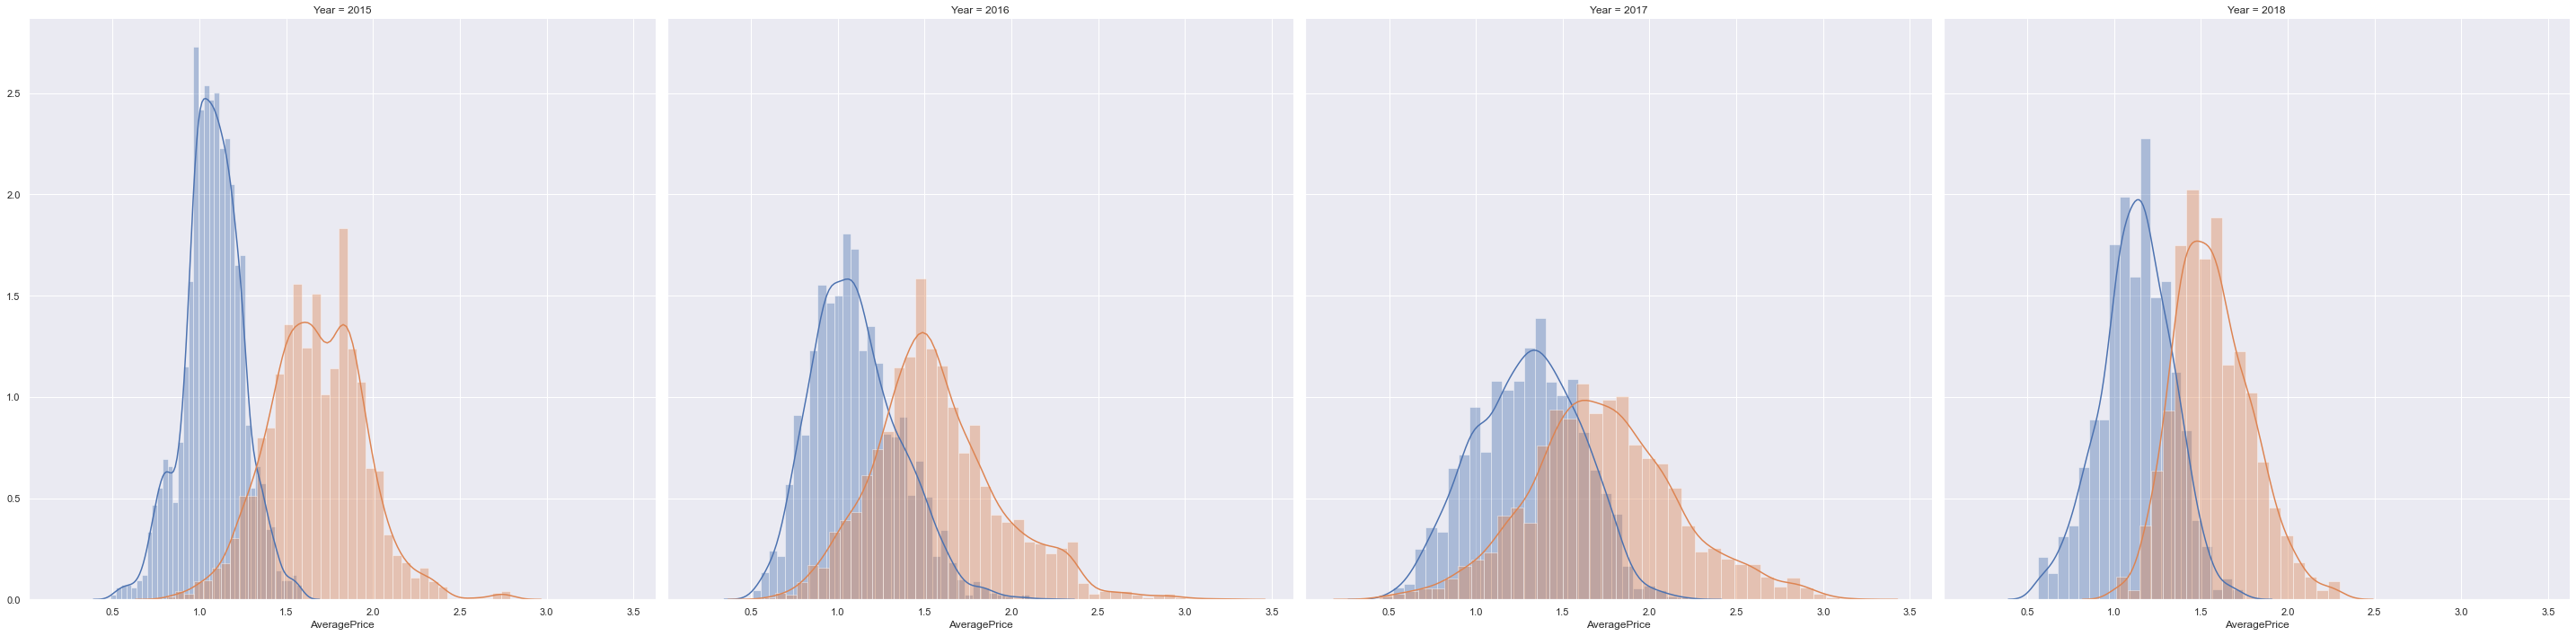

In [69]:
data['Year'] = data.index.year
data['Month'] = data.index.month.astype(str)
data['Day'] = data.index.day
data['Season'] = data.Month.apply(lambda x: season_dict[x])

g = sns.FacetGrid(data, col='Year', size=10, hue='type')
g.map(sns.distplot, "AveragePrice")

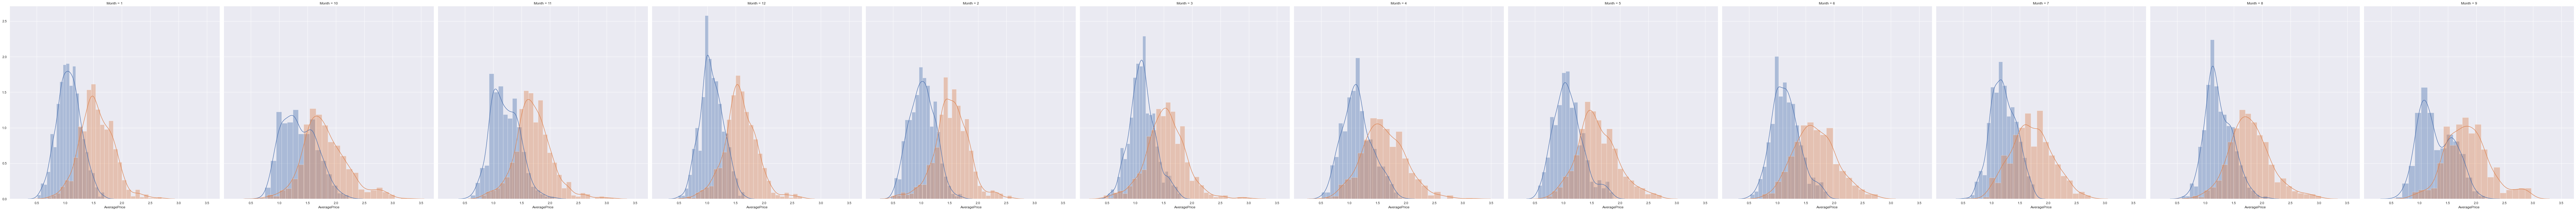

In [19]:
g = sns.FacetGrid(data, col='Month', size=10, hue='type')
g.map(sns.distplot, "AveragePrice")


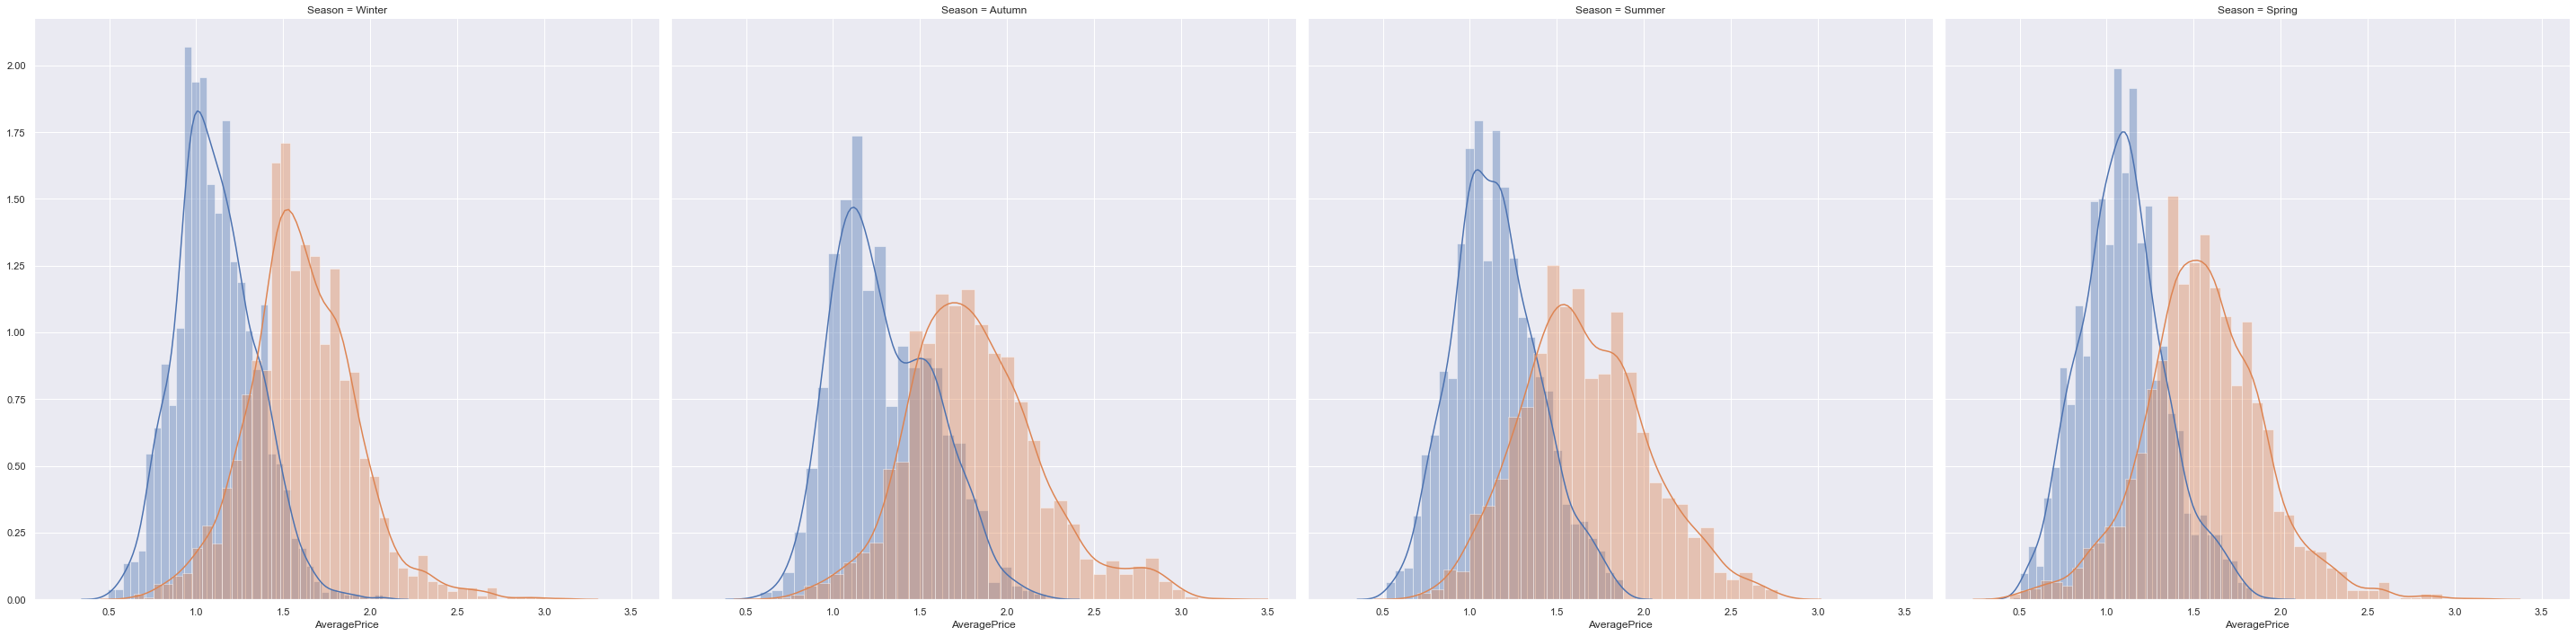

In [23]:
g = sns.FacetGrid(data, col='Season', size=10, hue='type')
g.map(sns.distplot, "AveragePrice")

In [119]:
## What does it happen to the price in the different months of the year?

(1.0195092592592583, 1.5796825396825367)

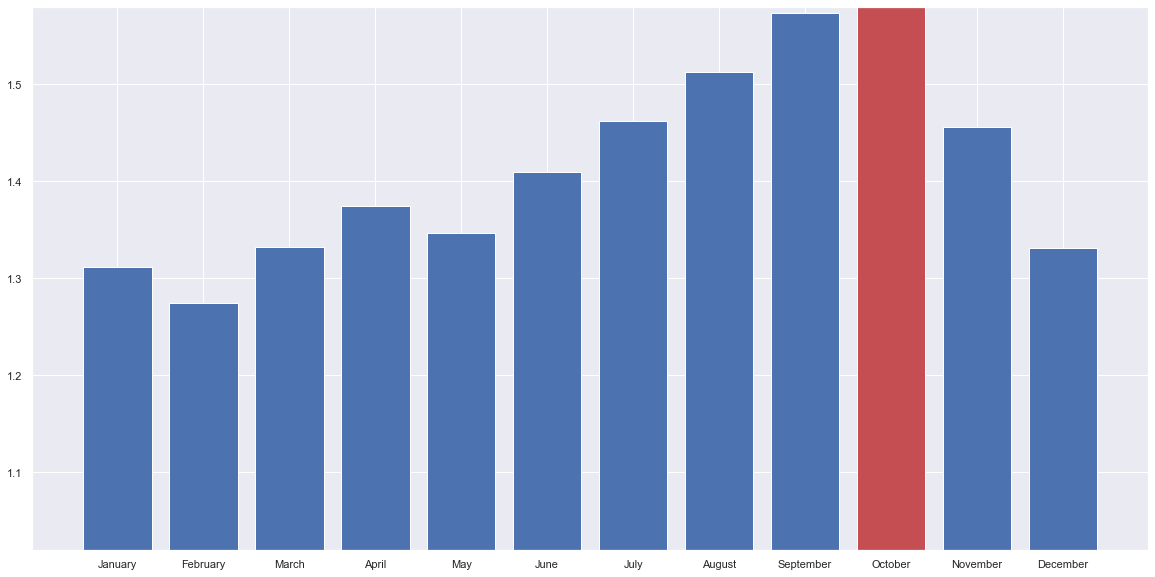

In [120]:
grouped = data.groupby(['Month']).mean()
grouped.index = grouped.index.astype(int)
grouped.sort_index(ascending=True)
grouped['MonthNum'] = grouped.index
grouped['MonthName'] = grouped.MonthNum.apply(lambda x: calendar.month_name[x])
grouped.sort_index(ascending=True, inplace=True)
max_bar = max(grouped.AveragePrice)
max_bar = grouped.MonthNum[grouped['AveragePrice'] == max_bar].tolist()[0]-1
ax = plt.bar(x=grouped.MonthName, height=grouped.AveragePrice)
ax[max_bar].set_fc('r')
plt.ylim([min(grouped.AveragePrice)-0.2*min(grouped.AveragePrice), max(grouped.AveragePrice)])
